# Reto Pokemon by @jasonssdev

## Importar Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Path


In [3]:
# Project root directory retroceder one level
project_root = Path().resolve() / '..'
# Path to the Pokémon data file
pokemon_data_path = project_root / 'data' / 'all_pokemon_data.csv'
pokemon_data_path


PosixPath('/Users/franciscomarchena/Documents/proyectos/pydatapanama-retos/retos/reto-pokemon-jasonssdev/submissions/../data/all_pokemon_data.csv')

## Cargar Dataset

In [4]:
df_pokemon = pd.read_csv(pokemon_data_path)
df_pokemon.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


## Preguntas

## 🔹 Nivel Low (Básico)

### Pregunta 1: ¿Cuántos pokemones hay en total?

In [24]:
allNames = df_pokemon['Name'].unique()
totalPokemon = len(allNames)
print(f'Total Pokémon: {totalPokemon}')

Total Pokémon: 1184


### Pregunta 2: ¿Cuáles son los 5 tipos más comunes (columna `Primary Typing`)?

In [ ]:
print("Top 5 Pokémon by Primary Type:")
top5_types = df_pokemon['Primary Typing'].value_counts().head(5)
print("Top 5 tipos más comunes (Primary Typing):")
print(top5_types)
 

Top 5 Pokémon by Primary Type:
Top 5 tipos más comunes (Primary Typing):
Primary Typing
water     145
normal    128
grass     113
bug        89
fire       77
Name: count, dtype: int64


### Pregunta 3: ¿Cuál es el promedio de Velocidad `(Speed)` de todos los pokemones?

In [30]:
speedMean = df_pokemon['Speed'].mean()
print(f"Velocidad media de los Pokémon: {speedMean:.2f}")

Velocidad media de los Pokémon: 69.73


## 🔸 Nivel Medium (Intermedio)

### Pregunta 4: ¿Cuál es la correlación entre las estadísticas `Attack`, `Defense` y `Speed`? Muestra un heatmap.

Correlación entre las columnas Attack, Defense y Speed:
         Attack  Defense  Speed
Attack     1.00     0.48   0.38
Defense    0.48     1.00   0.00
Speed      0.38     0.00   1.00


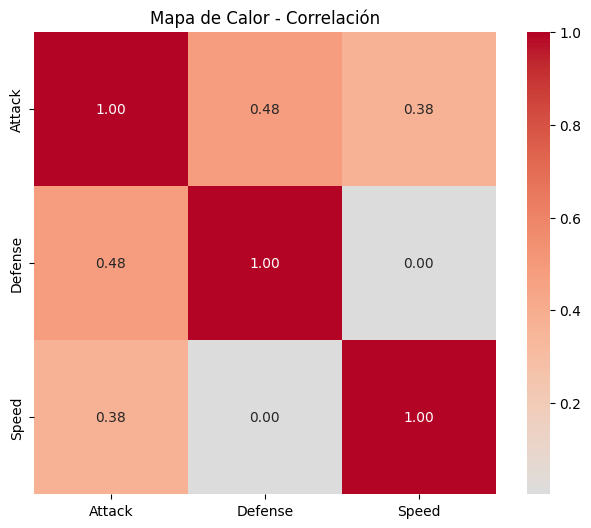

In [31]:
columnStatistics = ['Attack', 'Defense', 'Speed']
Statistics = df_pokemon[columnStatistics].corr()
print("Correlación entre las columnas Attack, Defense y Speed:")
print(Statistics.round(2)) 

plt.figure(figsize=(8, 6))
sns.heatmap(Statistics, 
            annot=True,          # Mostrar valores
            cmap='coolwarm',     # Colores azul-rojo
            center=0,            # Centro en 0
            square=True,         # Celdas cuadradas
            fmt='.2f')           # 2 decimales

plt.title('Mapa de Calor - Correlación')
plt.show()

### Pregunta 5: ¿Qué tipo (`Primary Typing`) tiene el mayor promedio de `Attack`?

In [32]:
top1PrimaryTypeforAttack = df_pokemon.groupby('Primary Typing')['Attack'].mean().idxmax()
print(f"Tipo Primario con mayor ataque medio: {top1PrimaryTypeforAttack}")

Tipo Primario con mayor ataque medio: dragon


### Pregunta 6: Crear un histograma de la variable `Speed`

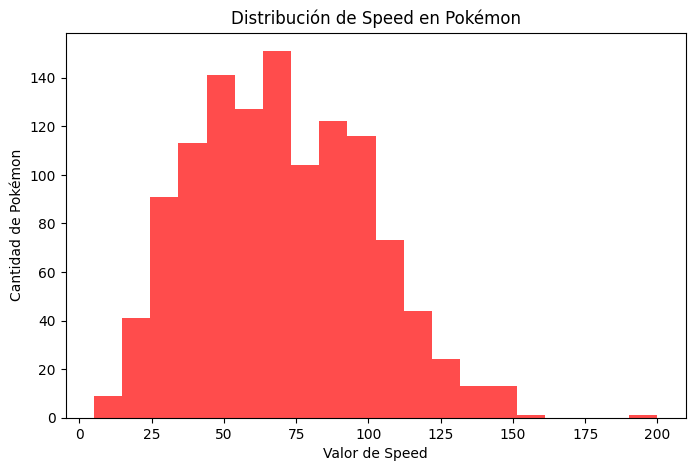

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_pokemon['Speed'], bins=20, color='red', alpha=0.7 )
plt.title('Distribución de Speed en Pokémon')
plt.xlabel('Valor de Speed')
plt.ylabel('Cantidad de Pokémon')
plt.show()

## 🔺 Nivel High (Avanzado)

### Pregunta 7: ¿Qué pokemones tienen estadísticas totales (`Base Stat Total`) superiores al percentil 90? ¿Qué tipos predominan en este grupo?

In [32]:
percentil_90 = df_pokemon['Base Stat Total'].quantile(0.90)
print(f"Percentil 90 de Base Stat Total: {percentil_90:.0f}")
pokemon_elite = df_pokemon[df_pokemon['Base Stat Total'] > percentil_90].copy()

print(f"\nCantidad de Pokémon por encima del percentil 90: {len(pokemon_elite)}")
print(f"Esto representa el {len(pokemon_elite)/len(df_pokemon)*100:.1f}% del total")

gruped_pokemon = pokemon_elite.groupby('Primary Typing')
print("\nPokémon por encima del percentil 90 por tipo primario:") 
print(gruped_pokemon.size().sort_values(ascending=False))   

Percentil 90 de Base Stat Total: 590

Cantidad de Pokémon por encima del percentil 90: 113
Esto representa el 9.5% del total

Pokémon por encima del percentil 90 por tipo primario:
Primary Typing
dragon      22
psychic     21
steel       10
water       10
normal       7
fire         6
dark         5
fighting     5
grass        5
rock         5
bug          4
electric     3
fairy        3
ground       3
ghost        2
poison       2
dtype: int64


### Pregunta 8: Clasifica a los pokemones en tres categorías según su `Base Stat Total`: "Débil", "Normal" y "Fuerte". Luego, muestra la distribución de estas categorías en un gráfico de barras.

Distribución corregida:
Categoria_Fuerza
Normal    536
Débil     535
Fuerte    113
Name: count, dtype: int64


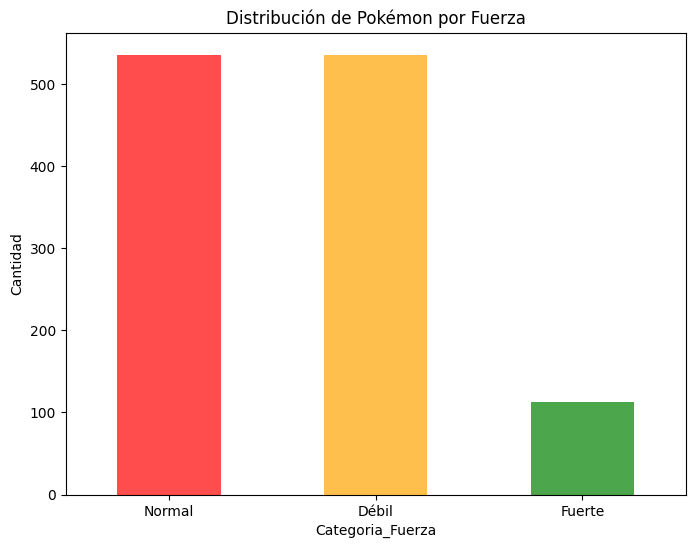


Rangos usados:
Débil: 175 - 442
Normal: 442 - 590
Fuerte: > 590
(El máximo real es 780)


In [ ]:

valueStrong = pokemon_elite['Base Stat Total'].max()
valueMeanAllPokemon = df_pokemon['Base Stat Total'].mean()
valueMinAllPokemon = df_pokemon['Base Stat Total'].min()

percentil_90 = df_pokemon['Base Stat Total'].quantile(0.90)
df_pokemon['Categoria_Fuerza'] = pd.cut(df_pokemon['Base Stat Total'], 
                                       bins=[valueMinAllPokemon-1, valueMeanAllPokemon, percentil_90, float('inf')],
                                       labels=['Débil', 'Normal', 'Fuerte'])

plt.figure(figsize=(8, 6))
distribucion.plot(kind='bar', color=['red', 'orange', 'green'], alpha=0.7)
plt.title('Distribución de Pokémon por Fuerza')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

print(f"\nRangos usados:")
print(f"Débil: {valueMinAllPokemon} - {valueMeanAllPokemon:.0f}")
print(f"Normal: {valueMeanAllPokemon:.0f} - {percentil_90:.0f}")
print(f"Fuerte: > {percentil_90:.0f}")
print(f"(El máximo real es {valueStrong})")
 

In [ ]:
#codigo

### Pregunta 9: Crear un pairplot de `Attack`, `Defense`, `Speed` y colorear por `Legendary`

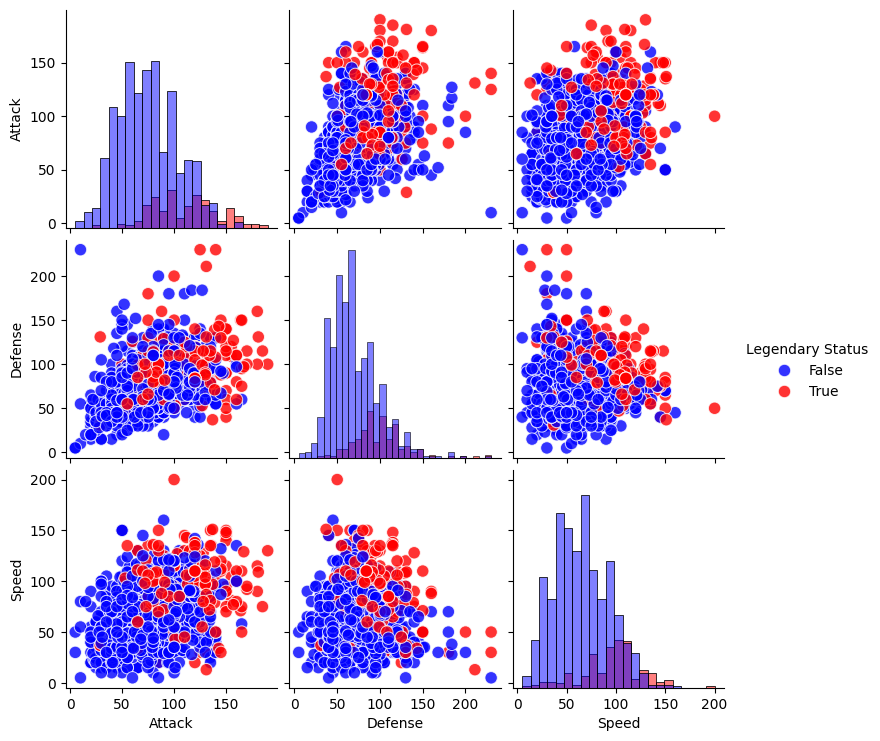

In [14]:
columnas = ['Attack', 'Defense', 'Speed']
 
pairplot = sns.pairplot(df_pokemon, 
                       vars=columnas,          
                       hue='Legendary Status',        
                       palette=['blue', 'red'],  
                       diag_kind='hist',        
                       plot_kws={'alpha': 0.8, 's': 80})  

plt.show() 